# TASK 2 - AIR POLLUTION PREDICTION

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df=pd.read_csv("airpolution.csv")
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
df['pm2.5'].fillna(df[ "pm2.5"].mean(),inplace=True)
df.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [7]:
# Encoding categorical variable
cat_val=[]
cont_val=[]
for columns in ap_data.columns:
    if df[columns].nunique()<=10:
        cat_val.append(columns)
    else:
        cont_val.append(columns)

In [9]:
print("categorical values are: ",cat_val)
print("continue values are: ", cont_val)

categorical values are:  ['year', 'cbwd']
continue values are:  ['No', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']


In [10]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [12]:
df1=pd.get_dummies(df,columns=cat_val,drop_first=True)
df1

,No,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
0,1,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0,0,0,0,0,1,0,0
1,2,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0,0,0,0,0,1,0,0
2,3,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0,0,0,0,0,1,0,0
3,4,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0,0,0,0,0,1,0,0
4,5,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,12,31,19,8.000000,-23,-2.0,1034.0,231.97,0,0,0,0,0,1,1,0,0
43820,43821,12,31,20,10.000000,-22,-3.0,1034.0,237.78,0,0,0,0,0,1,1,0,0
43821,43822,12,31,21,10.000000,-22,-3.0,1034.0,242.70,0,0,0,0,0,1,1,0,0
43822,43823,12,31,22,8.000000,-22,-4.0,1034.0,246.72,0,0,0,0,0,1,1,0,0


In [13]:
# scaling numerical variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1[cont_val]=ss.fit_transform(df1[cont_val])

# exploratory data analysis

Text(0, 0.5, 'counts')

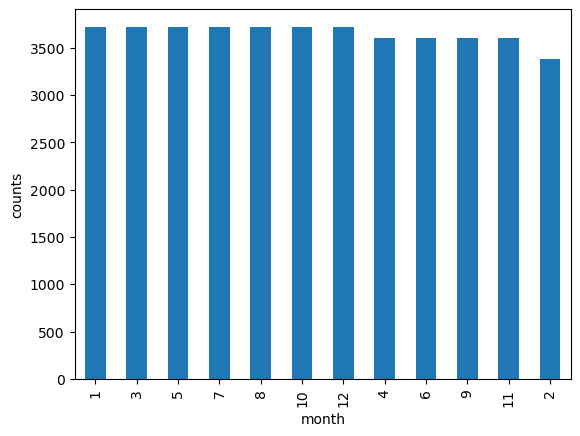

In [14]:
df['month'].value_counts().plot.bar()
plt.xlabel('month')
plt.ylabel('counts')


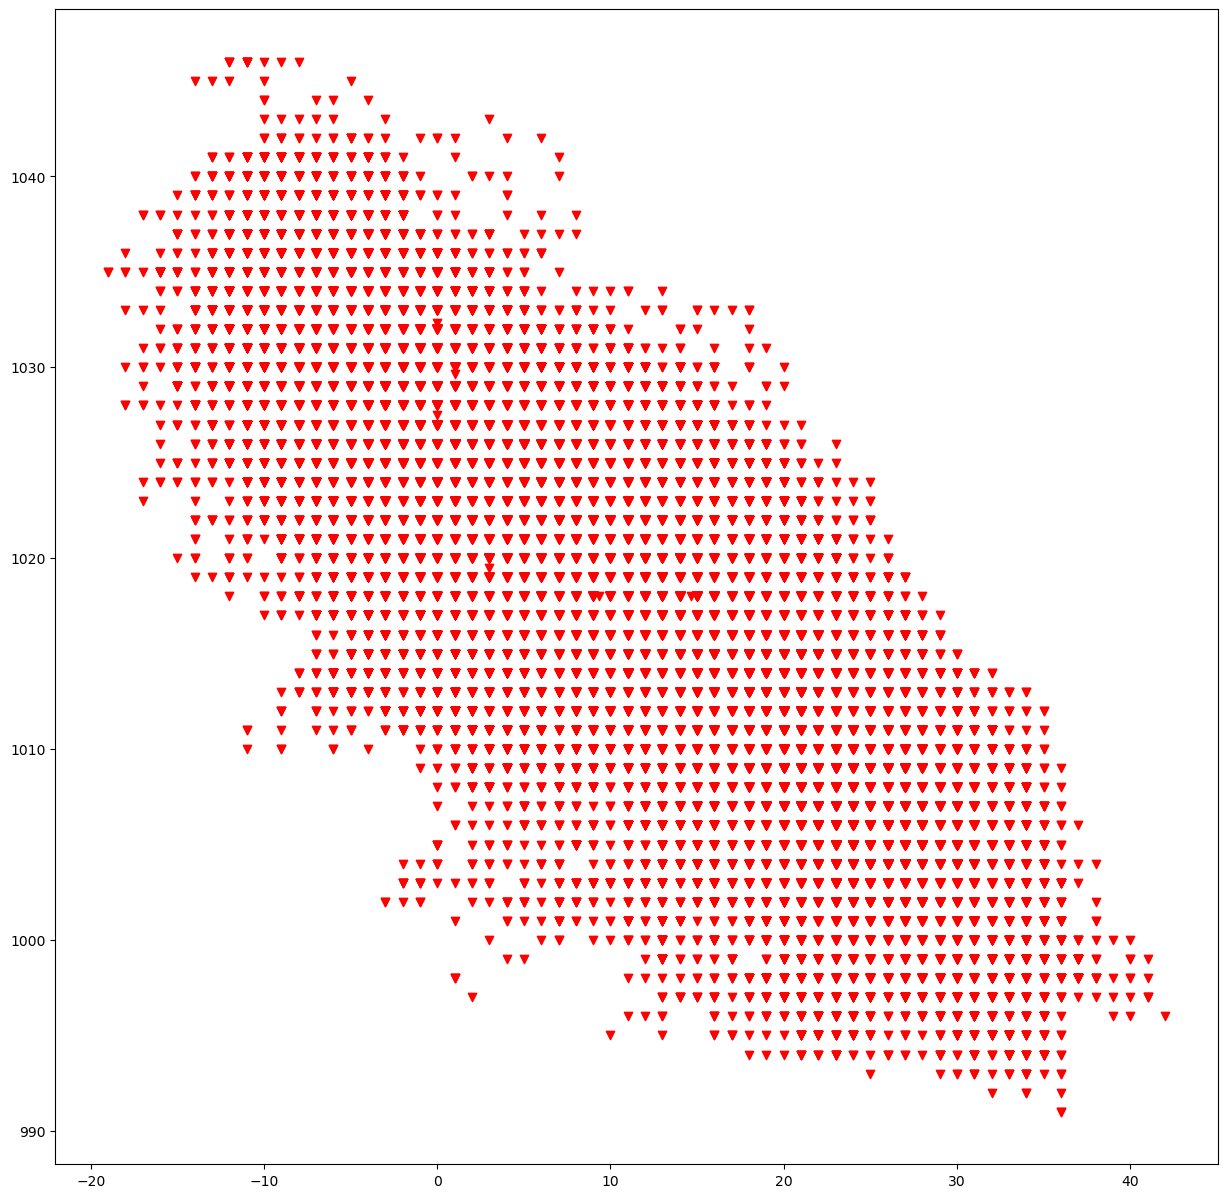

In [23]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['TEMP'], y = df['PRES'], marker = 'v', color = 'red')

<Axes: xlabel='pm2.5', ylabel='count'>

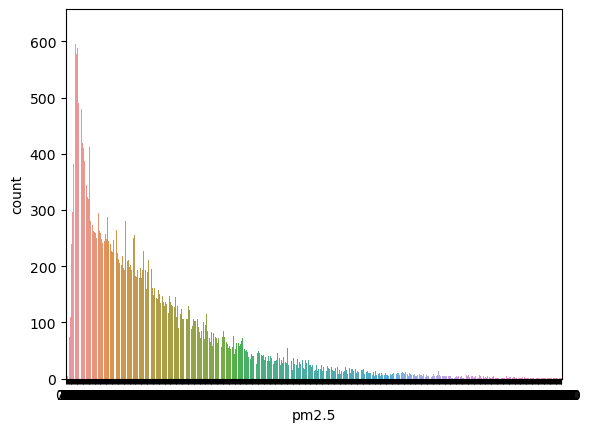

In [15]:
sns.countplot(x=ap_data['pm2.5'],data=ap_data)


<Axes: xlabel='cbwd', ylabel='Count'>

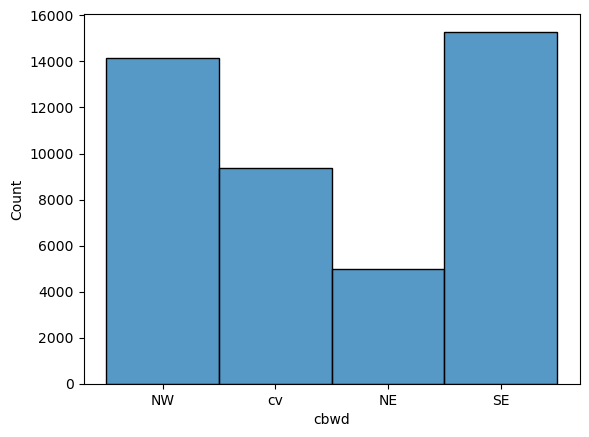

In [16]:
sns.histplot(data=ap_data['cbwd'])


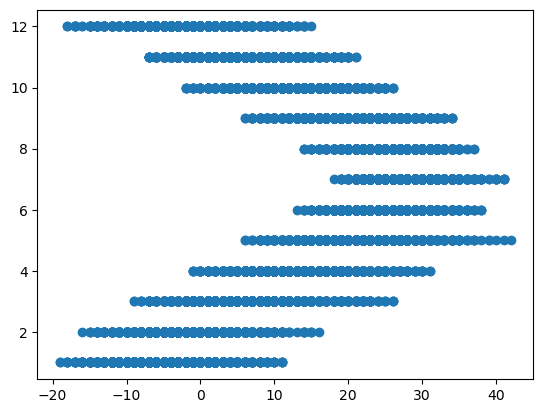

In [17]:
plt.scatter(x=ap_data['TEMP'],y=ap_data['month'])


# MODEL IMPLEMENTATION

In [26]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [29]:
x= df1.drop('pm2.5', axis = 1)
y = df1['pm2.5']

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=40)
X_train

,No,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
27051,0.406256,-1.311731,-1.673744,-1.227936,-0.472328,-1.430386,0.638097,-0.441894,-0.069353,-0.137667,0,0,1,0,0,0,0
4989,-1.337652,0.138161,1.281028,1.372399,1.467633,1.438826,-1.309592,0.568303,-0.069353,-0.137667,0,0,0,0,0,1,0
33836,0.942581,1.298074,-0.650939,1.227936,-1.442309,-0.364679,0.930250,-0.379306,-0.069353,-0.137667,0,0,1,0,1,0,0
38736,1.329905,-0.151818,-1.446454,-1.661325,0.774790,0.783006,-0.725286,-0.146953,-0.069353,-0.137667,0,0,0,1,1,0,0
18970,-0.232513,-1.021753,-1.673744,-0.216695,-0.403044,-0.774566,0.832865,-0.459890,-0.069353,-0.137667,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,-0.820456,-0.731775,1.167383,0.072232,-0.056622,0.701029,-1.406977,-0.075368,-0.069353,-0.137667,1,0,0,0,1,0,0
27640,0.452814,-1.311731,1.053738,0.650084,-0.264475,-1.102476,0.930250,-0.352512,1.245803,-0.137667,0,0,1,0,1,0,0
14501,-0.585769,0.428139,1.394673,-0.939010,1.121211,0.455096,-0.530517,-0.424097,-0.069353,-0.137667,1,0,0,0,1,0,0
30727,0.696828,0.138161,-1.332809,-0.650084,1.190496,1.110916,-2.186052,-0.173748,-0.069353,-0.137667,0,0,1,0,1,0,0


In [43]:
Y_train

27051   -0.006825
4989     0.304798
33836   -0.296189
38736   -0.463129
18970    1.473383
           ...   
11532   -0.641199
27640    0.605291
14501    0.015434
30727   -0.886046
11590    0.000000
Name: pm2.5, Length: 35059, dtype: float64

In [44]:
X_test

,No,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
36622,1.162803,-1.021753,-1.105519,1.516862,-1.858015,-0.856543,1.222403,-0.137955,-0.069353,-0.137667,0,0,0,1,0,1,0
21170,-0.058612,-0.151818,-1.673744,-1.372399,0.913358,0.291141,-0.238363,-0.325717,-0.069353,0.568622,0,1,0,0,1,0,0
7840,-1.112292,1.298074,0.826448,0.650084,-0.610897,-0.446656,0.151174,-0.459890,-0.069353,-0.137667,0,0,0,0,0,0,1
29130,0.570592,-0.731775,1.394673,0.939010,0.359084,0.537074,-0.822670,-0.415099,-0.069353,-0.137667,0,0,1,0,1,0,0
7639,-1.128181,1.298074,-0.082713,-0.650084,-0.680181,-1.020498,1.806710,4.100792,-0.069353,-0.137667,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36363,1.142330,-1.311731,0.940093,-1.227936,-0.472328,-0.856543,1.125019,-0.459890,-0.069353,-0.137667,0,0,0,1,1,0,0
43693,1.721735,1.588052,1.167383,0.216695,-0.749466,-0.856543,1.417172,-0.442094,-0.069353,-0.137667,0,0,0,1,0,0,1
20621,-0.102009,-0.441796,-0.764584,-0.939010,0.428368,-0.036769,-0.238363,-0.424297,-0.069353,-0.137667,0,1,0,0,0,0,1
16324,-0.441668,1.298074,-0.423648,-1.083473,-0.125907,-0.200724,-0.043595,-0.137955,-0.069353,-0.137667,1,0,0,0,1,0,0


In [45]:
Y_test

36622   -0.641199
21170   -0.485388
7840     1.217407
29130   -0.029083
7639    -0.874916
           ...   
36363    2.675356
43693    0.594162
20621    0.071081
16324   -0.886046
17282   -0.941693
Name: pm2.5, Length: 8765, dtype: float64

In [46]:
print(X_train.shape)
print(X_test.shape)

(35059, 17)
(8765, 17)


# 

# RIDGE REGRESSOR

In [47]:
rr = Ridge(alpha=0.1)
rr.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [48]:
pred_train_rr = (rr.predict(X_train))
pred_test_rr = (rr.predict(X_test))

# RANDOM FOREST REGRESSOR

In [50]:
reg = RandomForestRegressor(random_state = 42, n_estimators = 60, max_depth = 5, min_samples_split = 4, bootstrap = True)
reg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, min_samples_split=4, n_estimators=60,
                      random_state=42)

In [51]:
pred_train_reg = (reg.predict(X_train))
pred_test_reg = (reg.predict(X_test))

# MODEL EVALUATION

### RIDGE REGRESSOR

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,pred_test_rr))
print(" Mean squared error  :    ",mean_squared_error(Y_train,pred_train_rr))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,pred_train_rr)))


 Training DataSet 
 Mean absolute error :     0.6119024869951715
 Mean squared error  :     0.7399774441102097
 Root mean squared error:  0.8602194162597179


In [58]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,pred_test_rr))
print(" Mean squared error :     ",mean_squared_error(Y_test,pred_test_rr))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,pred_test_rr)))

 Testing DataSet 
 Mean absolute error :     0.6119024869951715
 Mean squared error :      0.7075016059777566
 Root mean squared error:  0.841131146717179


### RANDOM FOREST REGRESSOR

In [59]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,pred_train_reg))
print(" Mean squared error :     ",mean_squared_error(Y_train,pred_train_reg))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,pred_train_reg)))

 Training DataSet 
 Mean absolute error :     0.5634515176431829
 Mean squared error :      0.6320784120725781
 Root mean squared error:  0.7950335917887861


In [60]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,pred_test_reg))
print(" Mean squared error :     ",mean_squared_error(Y_test,pred_test_reg))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,pred_test_reg)))

 Testing DataSet 
 Mean absolute error :     0.5672160945250241
 Mean squared error :      0.6275321430900516
 Root mean squared error:  0.7921692641664732


# OVERFITTING AND CROSS VALIDATION

In [66]:
print(" Accuracy on training data set")
print(" Accuracy on Ridge Regressor training data set :         ",rr.score(X_train,Y_train))
print(" Accuracy on Random Forest Regressor training data set : ",reg.score(X_train,Y_train))
acc_ridge_train  = rr.score(X_train,Y_train)
acc_random_train =reg.score(X_train,Y_train)

 Accuracy on training data set
 Accuracy on Ridge Regressor training data set :          0.2638435874559807
 Accuracy on Random Forest Regressor training data set :  0.3711854597981935


In [65]:
print(" Accuracy on test data set")
print(" Accuracy on Ridge Regressor test data set :         ",rr.score(X_test,Y_test))
print(" Accuracy on Random Forest Regressor test data set : ",reg.score(X_test,Y_test))
acc_ridge_test=rr.score(X_test,Y_test)
acc_random_test=reg.score(X_test,Y_test)

 Accuracy on test data set
 Accuracy on Ridge Regressor test data set :          0.2774839186733473
 Accuracy on Random Forest Regressor test data set :  0.35915047951679835


In [63]:
if acc_ridge_train > acc_ridge_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS OVERFITTED


In [67]:
if acc_random_train > acc_random_test:
    print('RANDOM FOREST REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RANDOM FOREST REGRESSOR MODEL IS OVERFITTED')

RANDOM FOREST REGRESSOR MODEL IS NOT OVERFITTED!
